In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Resizing
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

The Fashion MNIST dataset is loaded. Images are normalized and converted to RGB format to be compatible with EfficientNet. Additionally, the images are resized to 32x32, which is the minimum input size accepted by this network. Lastly, the labels are one-hot encoded.

In [15]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0 
x_test = x_test / 255.0

x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, -1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, -1))


x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



The model is built using EfficientNetB0 as the base. The top classification head is excluded since it's designed for larger image problems. Instead, we use EfficientNet for feature extraction only, with random weight initialization to tailor it to our dataset. Input size and number of classes are specified. An average pooling layer converts feature maps into a vector, followed by dropout layers to reduce overfitting, a dense layer to improve learning capacity, and finally a softmax output layer. The model uses the Adam optimizer and categorical cross-entropy loss, with accuracy as the evaluation metric.

In [18]:

base_model = EfficientNetB0(
    include_top=False,
    weights=None,
    input_shape=(32, 32, 3),
    classes=10
)


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(32,  activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


The model is trained using the preprocessed Fashion MNIST dataset.

In [19]:

history = model.fit(x_train, y_train, epochs=10, validation_split=0.01)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


Epoch 1/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 160s 79ms/step - accuracy: 0.5809 - loss: 1.1722 - val_accuracy: 0.8067 - val_loss: 0.5204
Epoch 2/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 153s 82ms/step - accuracy: 0.8057 - loss: 0.5746 - val_accuracy: 0.8533 - val_loss: 0.4024
Epoch 3/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 150s 81ms/step - accuracy: 0.8343 - loss: 0.4977 - val_accuracy: 0.8617 - val_loss: 0.3559
Epoch 4/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.8597 - loss: 0.4183 - val_accuracy: 0.8933 - val_loss: 0.3209
Epoch 5/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 139s 75ms/step - accuracy: 0.8742 - loss: 0.3692 - val_accuracy: 0.8600 - val_loss: 0.3694
Epoch 6/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.8758 - loss: 0.3638 - val_accuracy: 0.8933 - val_loss: 0.2786
Epoch 7/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 137s 74ms/step - accuracy: 0.8864 - loss: 0.3248 - val_accuracy: 0.8967 - val_loss: 0.2970
Epoch 8/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 135s 73ms/step - accuracy: 

The final model achieves solid performance in classifying clothing items from the Fashion MNIST dataset.

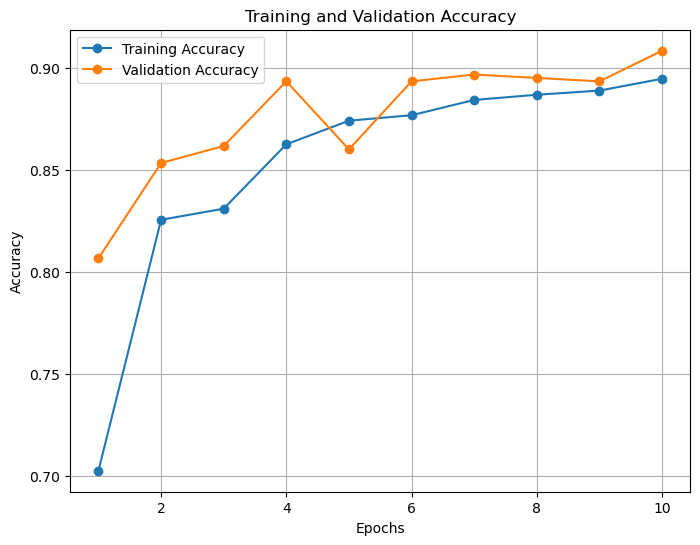

In [20]:

# Extract metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot the metrics
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()